In [ ]:
!unzip tumor.zip

In [ ]:
!pip install keras-tuner

In [8]:
import numpy as np
import pandas as pd
import keras 
from keras.layers import*
from keras.callbacks import*
from keras.models import*
from keras.preprocessing import*
import kerastuner as kt

In [3]:
train_path = '/content/Brain Tumor Images Dataset/training_set'
test_path = '/content/Brain Tumor Images Dataset/test_set'
validation_path = '/content/Brain Tumor Images Dataset/validation_set'

In [5]:
train_img = image.ImageDataGenerator(zoom_range=0.2,shear_range=0.2,horizontal_flip=True,rescale=1/255.0)
test_img = image.ImageDataGenerator(rescale=1/255.0)
val_img = image.ImageDataGenerator(rescale=1/255.0)

In [6]:
train = train_img.flow_from_directory('Brain Tumor Images Dataset/training_set',target_size=(224,224),class_mode='binary')
test = test_img.flow_from_directory('Brain Tumor Images Dataset/test_set',target_size=(224,224),class_mode='binary')
val = val_img.flow_from_directory('Brain Tumor Images Dataset/validation_set',target_size=(224,224),class_mode='binary')

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [55]:
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape=(224,224,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 54, 54, 64)       

In [63]:
history=model.fit(train,epochs=80,batch_size=128,validation_data=test, shuffle=True)

Epoch 1/80
5/5 [==============================] - 3s 502ms/step - loss: 0.4261 - accuracy: 0.8000 - val_loss: 0.6274 - val_accuracy: 0.6500
Epoch 2/80
5/5 [==============================] - 2s 455ms/step - loss: 0.5034 - accuracy: 0.8000 - val_loss: 0.5831 - val_accuracy: 0.7500
Epoch 3/80
5/5 [==============================] - 2s 459ms/step - loss: 0.5798 - accuracy: 0.7071 - val_loss: 0.6103 - val_accuracy: 0.7500
Epoch 4/80
5/5 [==============================] - 2s 385ms/step - loss: 0.5051 - accuracy: 0.7786 - val_loss: 0.6105 - val_accuracy: 0.6500
Epoch 5/80
5/5 [==============================] - 2s 384ms/step - loss: 0.4722 - accuracy: 0.7714 - val_loss: 0.5500 - val_accuracy: 0.8000
Epoch 6/80
5/5 [==============================] - 2s 384ms/step - loss: 0.4058 - accuracy: 0.8000 - val_loss: 0.5061 - val_accuracy: 0.8000
Epoch 7/80
5/5 [==============================] - 2s 388ms/step - loss: 0.4132 - accuracy: 0.8000 - val_loss: 0.4691 - val_accuracy: 0.8000
Epoch 8/80
5/5 [====

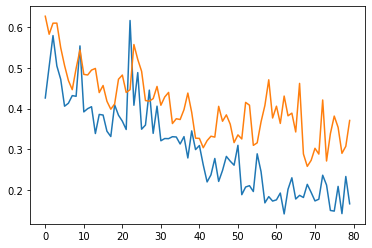

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])